# AVALIAÇÃO 3

# exercício 1
![alt text]({2001BDF5-D177-4476-9778-2FE9B744033F}.png)

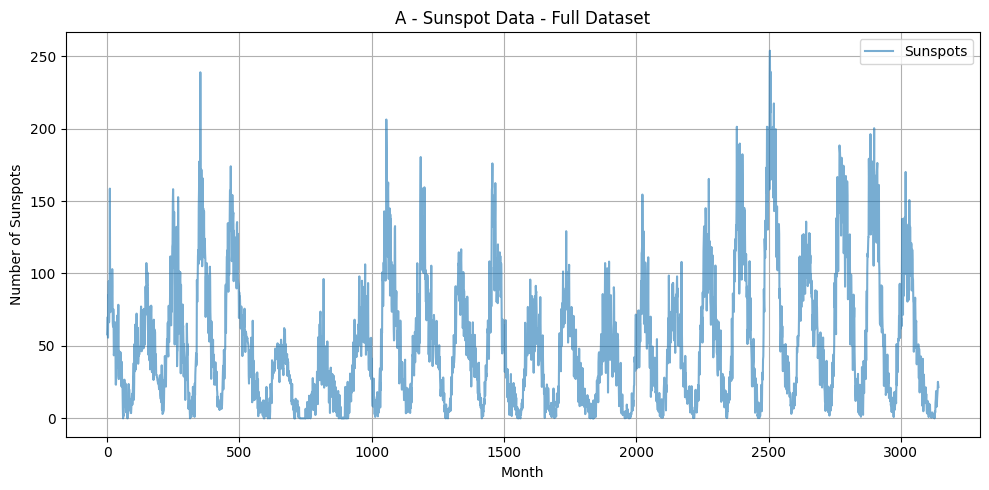

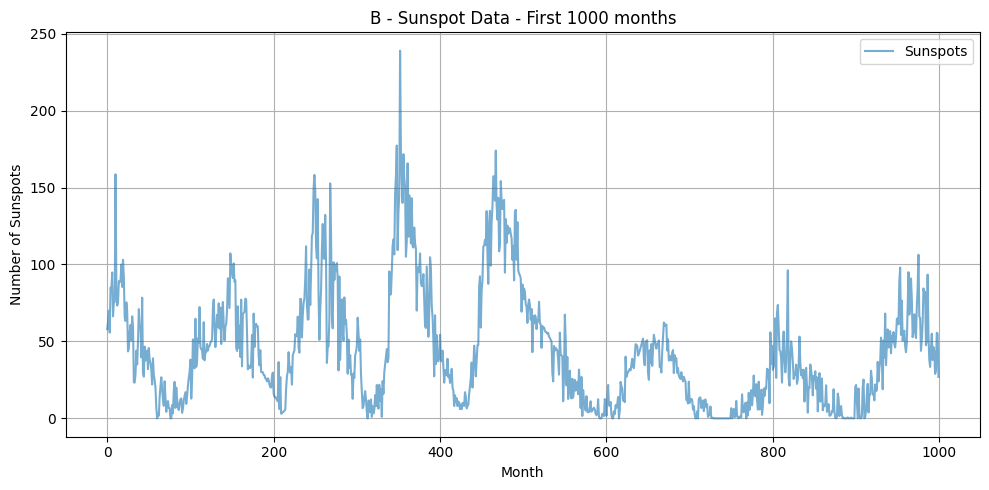

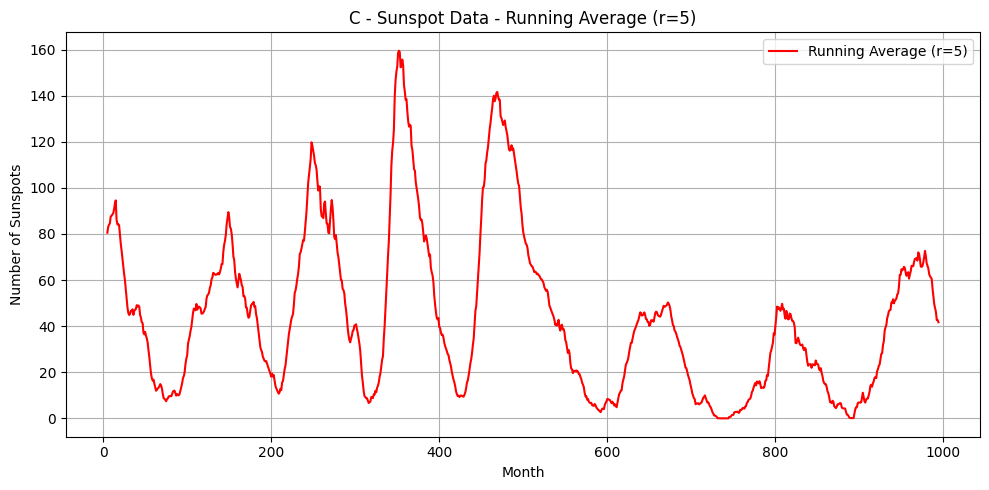

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Passo a: Ler o arquivo
data = np.loadtxt("sunspots.txt")
months = data[:, 0]
sunspots = data[:, 1]
plt.figure(figsize=(10, 5))
plt.plot(months, sunspots, label="Sunspots", alpha=0.6)
plt.xlabel("Month")
plt.ylabel("Number of Sunspots")
plt.title("A - Sunspot Data - Full Dataset")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Passo b: Limitar aos primeiros 1000 pontos
months_1000 = months[:1000]
sunspots_1000 = sunspots[:1000]
plt.figure(figsize=(10, 5))
plt.plot(months_1000, sunspots_1000, label="Sunspots", alpha=0.6)
plt.xlabel("Month")
plt.ylabel("Number of Sunspots")
plt.title("B - Sunspot Data - First 1000 months")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Passo c: Calcular a média móvel com r = 5
r = 5
running_avg = []

# Aplicar a média móvel com janela de tamanho 2r + 1 (11)
for k in range(r, 1000 - r):
    window = sunspots_1000[k - r:k + r + 1]
    avg = np.mean(window)
    running_avg.append(avg)

# Criar eixo de tempo correspondente à média móvel
months_avg = months_1000[r:1000 - r]

# Plotar os dados
plt.figure(figsize=(10, 5))
plt.plot(months_avg, running_avg, label="Running Average (r=5)", color='red')
plt.xlabel("Month")
plt.ylabel("Number of Sunspots")
plt.title("C - Sunspot Data - Running Average (r=5)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# exercício 2
![alt text]({3B85B007-0481-410C-9F03-EA34D7DC349D}.png)

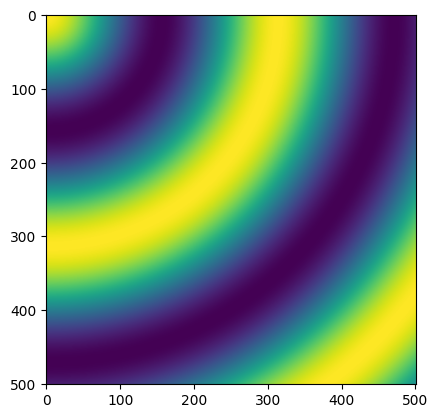

In [ ]:
# grafico colorido 
from pylab import imshow,show
from numpy import loadtxt
data = loadtxt("circular.txt",float)
imshow(data)
show()


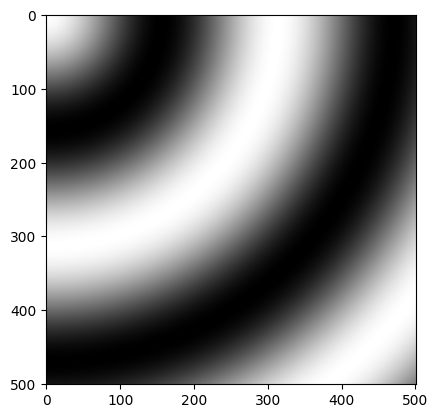

In [ ]:
# grafico monocromático
from pylab import imshow,gray,show
data = loadtxt("circular.txt",float)
imshow(data)
gray()
show()

# exercício 3
![alt text]({2991A0C0-40AC-4A87-8AD4-5A1AF835D17F}.png)

         Entity Code  Year  Eletricidade (%)  Combustíveis limpos (%)  \
0   El Salvador  SLV  2000              84.5                    58.40   
1   El Salvador  SLV  2001              87.1                    60.60   
2   El Salvador  SLV  2002              87.5                    62.30   
3   El Salvador  SLV  2003              87.0                    64.10   
4   El Salvador  SLV  2004              87.4                    66.10   
5   El Salvador  SLV  2005              87.5                    67.80   
6   El Salvador  SLV  2006              89.2                    69.50   
7   El Salvador  SLV  2007              91.1                    71.20   
8   El Salvador  SLV  2008              91.0                    73.10   
9   El Salvador  SLV  2009              91.1                    74.90   
10  El Salvador  SLV  2010              91.6                    76.70   
11  El Salvador  SLV  2011              92.6                    78.50   
12  El Salvador  SLV  2012              93.7       

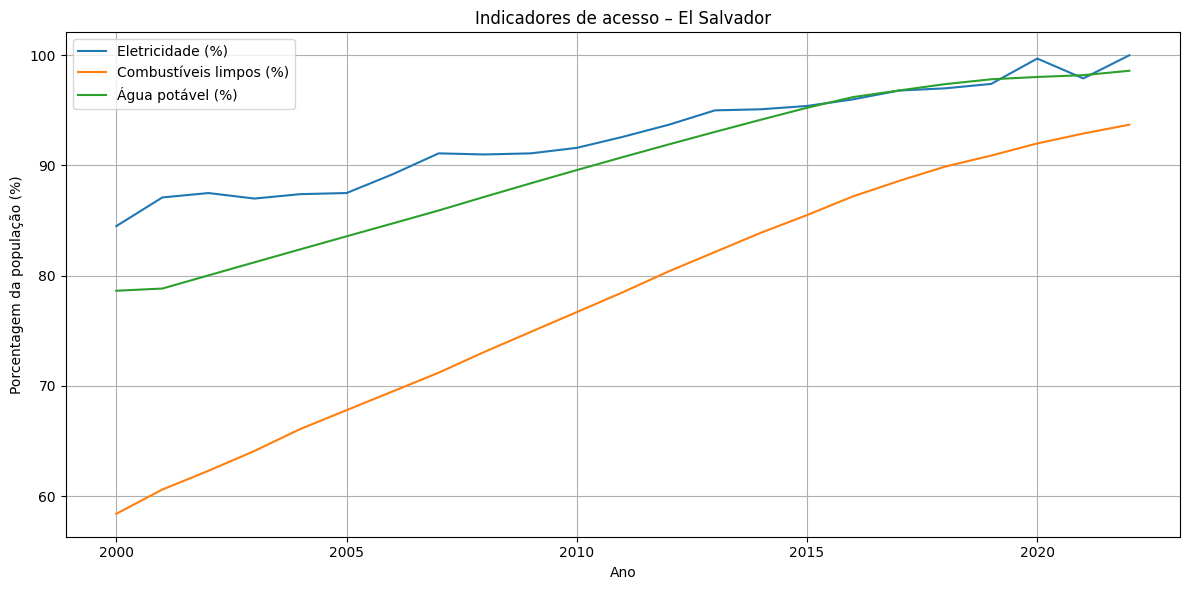

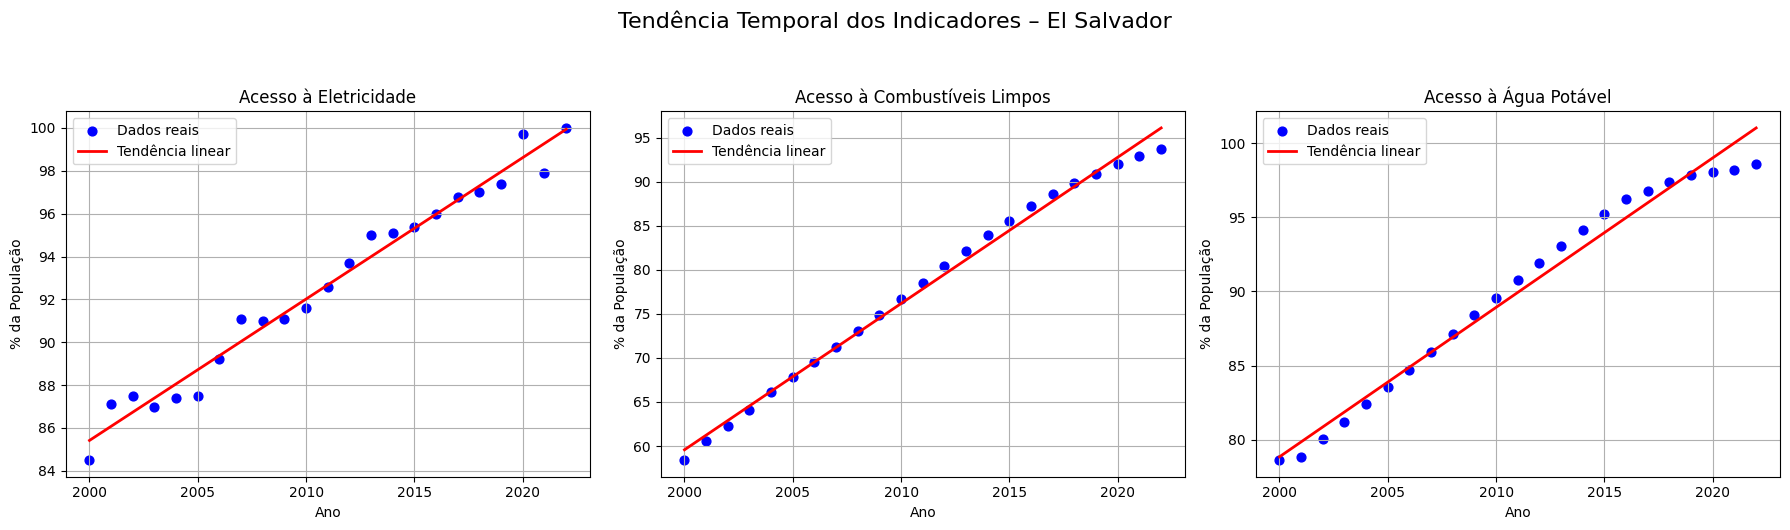

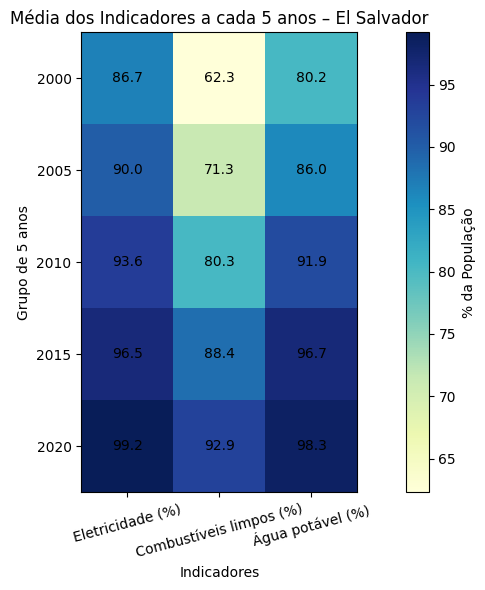

<Figure size 600x500 with 0 Axes>

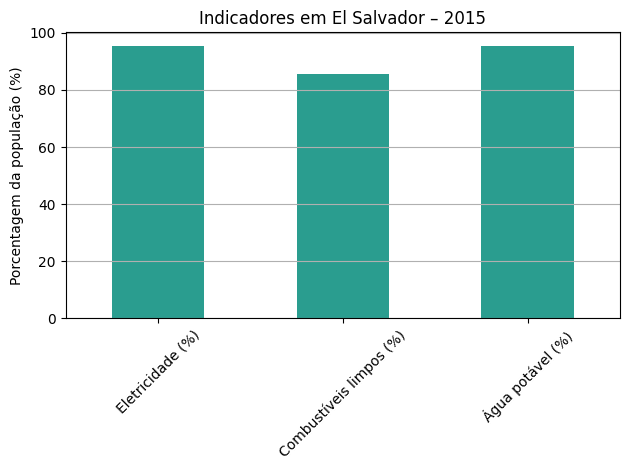

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Carregar os dados dos três arquivos
eletricidade = pd.read_csv("eletricidade.csv")
combustiveis = pd.read_csv("combustiveis_limpos.csv")
agua = pd.read_csv("agua_potavel.csv")

# Filtrar apenas El Salvador
pais = "El Salvador"
eletricidade_sv = eletricidade[eletricidade["Entity"] == pais]
combustiveis_sv = combustiveis[combustiveis["Entity"] == pais]
agua_sv = agua[agua["Entity"] == pais]

# Renomear colunas para facilitar
eletricidade_sv = eletricidade_sv.rename(columns={"Access to electricity (% of population)": "Eletricidade (%)"})
combustiveis_sv = combustiveis_sv.rename(columns={
    "Proportion of population with primary reliance on clean fuels and technologies for cooking (%) - Residence area type: Total": "Combustíveis limpos (%)"
})
agua_sv = agua_sv.rename(columns={
    "Share of the population using at least basic drinking water services": "Água potável (%)"
})

# Unir os três DataFrames com base em 'Entity', 'Code' e 'Year'
df = eletricidade_sv.merge(combustiveis_sv, on=["Entity", "Code", "Year"])
df = df.merge(agua_sv, on=["Entity", "Code", "Year"])

# Mostrar os primeiros dados organizados
print(df)

# 1 - grafico com linha temporaral para os três indicadores


plt.figure(figsize=(12, 6))
plt.plot(df["Year"], df["Eletricidade (%)"], label="Eletricidade (%)")
plt.plot(df["Year"], df["Combustíveis limpos (%)"], label="Combustíveis limpos (%)")
plt.plot(df["Year"], df["Água potável (%)"], label="Água potável (%)")

plt.xlabel("Ano")
plt.ylabel("Porcentagem da população (%)")
plt.title("Indicadores de acesso – El Salvador")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



# 2 - gráfico de dispersão com regressão linear para cada indicador

# Lista com os nomes das colunas e títulos
indicadores = [
    ("Eletricidade (%)", "Acesso à Eletricidade"),
    ("Combustíveis limpos (%)", "Acesso à Combustíveis Limpos"),
    ("Água potável (%)", "Acesso à Água Potável")
]

plt.figure(figsize=(18, 5))

for i, (coluna, titulo) in enumerate(indicadores, 1):
    plt.subplot(1, 3, i)

    # Dados x (ano) e y (indicador)
    x = df["Year"].values
    y = df[coluna].values

    # Regressão linear: coeficientes da reta (y = ax + b)
    coef = np.polyfit(x, y, 1)
    polinomio = np.poly1d(coef)

    # Gerar linha de tendência
    x_tend = np.linspace(x.min(), x.max(), 100)
    y_tend = polinomio(x_tend)

    # Plotar pontos e linha
    plt.scatter(x, y, color="blue", s=40, label="Dados reais")
    plt.plot(x_tend, y_tend, color="red", linewidth=2, label="Tendência linear")

    plt.title(titulo)
    plt.xlabel("Ano")
    plt.ylabel("% da População")
    plt.grid(True)
    plt.legend()

plt.suptitle("Tendência Temporal dos Indicadores – El Salvador", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

# 3 - heatmap dos indicadores por decada

# Criar coluna de década - mudei para 5 anos para melhor visualização
df["Década"] = (df["Year"] // 5) * 5

# Agrupar por 5 anos e calcular a média dos indicadores
decadal = df.groupby("Década")[["Eletricidade (%)", "Combustíveis limpos (%)", "Água potável (%)"]].mean().round(1) #deixei o nome "decada" pela simplicidade, mas na verdade é um grupo de 5 anos

# Converter para matriz
dados = decadal.values
decadas = decadal.index.astype(int).tolist()
indicadores = decadal.columns.tolist()

# Plotar heatmap com matplotlib
plt.figure(figsize=(10, 6))
im = plt.imshow(dados, cmap="YlGnBu")

# Adicionar os valores nas células
for i in range(dados.shape[0]):
    for j in range(dados.shape[1]):
        texto = f"{dados[i, j]:.1f}" if not np.isnan(dados[i, j]) else ""
        plt.text(j, i, texto, ha='center', va='center', color='black')

# Configurar eixos
plt.xticks(ticks=np.arange(len(indicadores)), labels=indicadores, rotation=15)
plt.yticks(ticks=np.arange(len(decadas)), labels=decadas)
plt.xlabel("Indicadores")
plt.ylabel("Grupo de 5 anos")
plt.title("Média dos Indicadores a cada 5 anos – El Salvador")
plt.colorbar(im, label="% da População")

plt.tight_layout()
plt.show()


# 4 - gráfico de barras comparando os 3 indicadores em um único ano 
ano = 2015
dados_ano = df[df["Year"] == ano][["Eletricidade (%)", "Combustíveis limpos (%)", "Água potável (%)"]].T
dados_ano.columns = [str(ano)]

# Plotar gráfico de barras
plt.figure(figsize=(6, 5))
dados_ano.plot(kind="bar", legend=False, color=["#2a9d8f", "#e76f51", "#264653"])
plt.title(f"Indicadores em El Salvador – {ano}")
plt.ylabel("Porcentagem da população (%)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


